In [26]:
#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None) # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.0 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
text         128
sentiment      2
dtype: int64


In [28]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

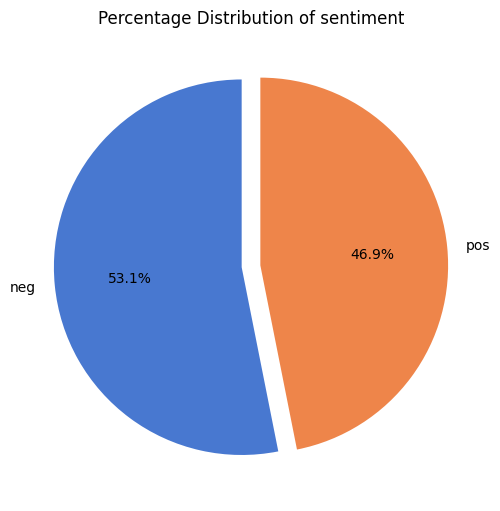

In [29]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [30]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ซึ่งกันและกัน',
 'ที่ไหน',
 'ก็',
 'จัดให้',
 'เยอะ',
 'สูงส่ง',
 'ทว่า',
 'เมื่อไร',
 'ด้วยเหตุว่า',
 'ใหญ่',
 'เยอะๆ',
 'นานๆ',
 'เสียแล้ว',
 'ยิ่งขึ้นไป',
 'เมื่อวันวาน',
 'เป็นเพราะว่า',
 'ยิ่งจน',
 'เพียง',
 'ได้มา',
 'เช่นดังที่',
 'เผื่อ',
 'จากนั้น',
 'กันนะ',
 'แห่งนั้น',
 'ตาม',
 'เถิด',
 'ให้มา',
 'ได้',
 'ออก',
 'พร้อมด้วย',
 'กำลังจะ',
 'ด้วยเหตุเพราะ',
 'จนแม้',
 'นับ',
 'แท้',
 'กระนั้น',
 'คราวนี้',
 'ทำไม',
 'เรียก',
 'เช่นใด',
 'พร้อมเพียง',
 'เมื่อใด',
 'ทุกคราว',
 'เล็กน้อย',
 'ถ้าจะ',
 'คราวนั้น',
 'เมื่อเย็น',
 'ซึ่ง',
 'ไง',
 'ที่ได้',
 'ง่ายๆ',
 'พอควร',
 'ถ้าหาก',
 'ช้านาน',
 'ทั้งเป็น',
 'ดั่ง',
 'แม้',
 'พวก',
 'มิฉะนั้น',
 'ค่อย',
 'มั๊ย',
 'เหตุผล',
 'นับแต่ที่',
 'เต็มไปหมด',
 'ด้วยเช่นกัน',
 'พอสม',
 'ทั้งนี้',
 'หรือไม่',
 'ทั้งนั้น',
 'กระผม',
 'ตลอดศก',
 'ทั้งตัว',
 'ต่าง',
 'เหตุนี้',
 'พบว่า',
 'ยืนยัน',
 'อันเนื่องมาจาก',
 'ได้แต่',
 'พอจะ',
 'พา',
 'นู้น',
 'จ๊ะ',
 'บางๆ',
 'แต่จะ',
 'อย่างดี',
 'ในเมื่อ',
 'ถ้า',
 'นั่น',
 'จากนี้',
 'เรื่อย',
 

In [31]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final


In [32]:
import re
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [33]:
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

In [34]:
df.head()

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...


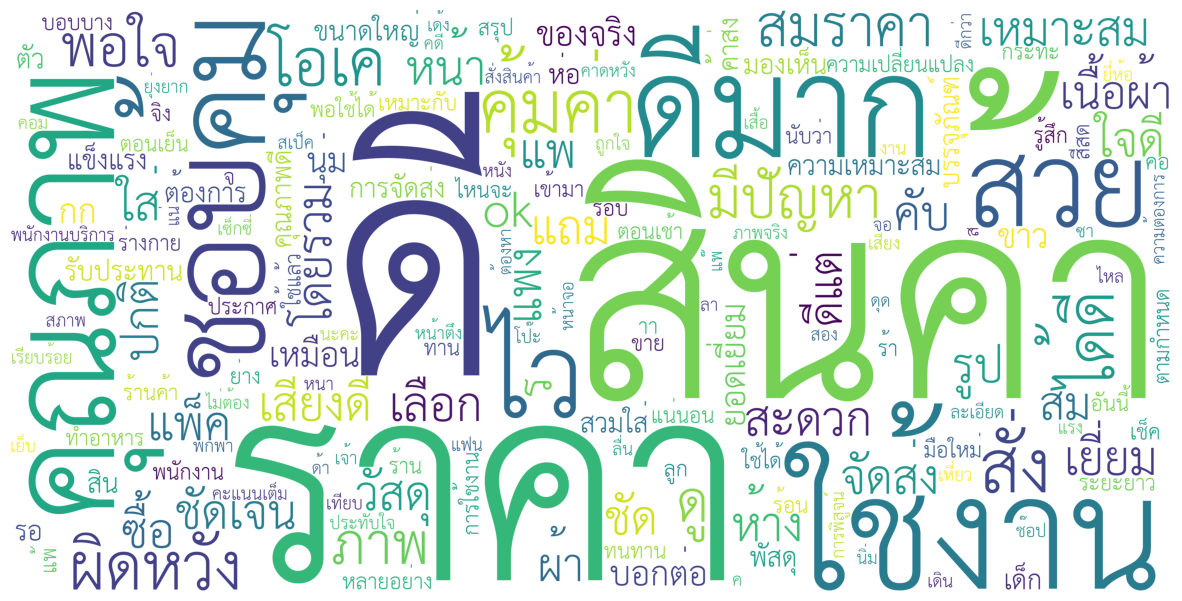

In [40]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

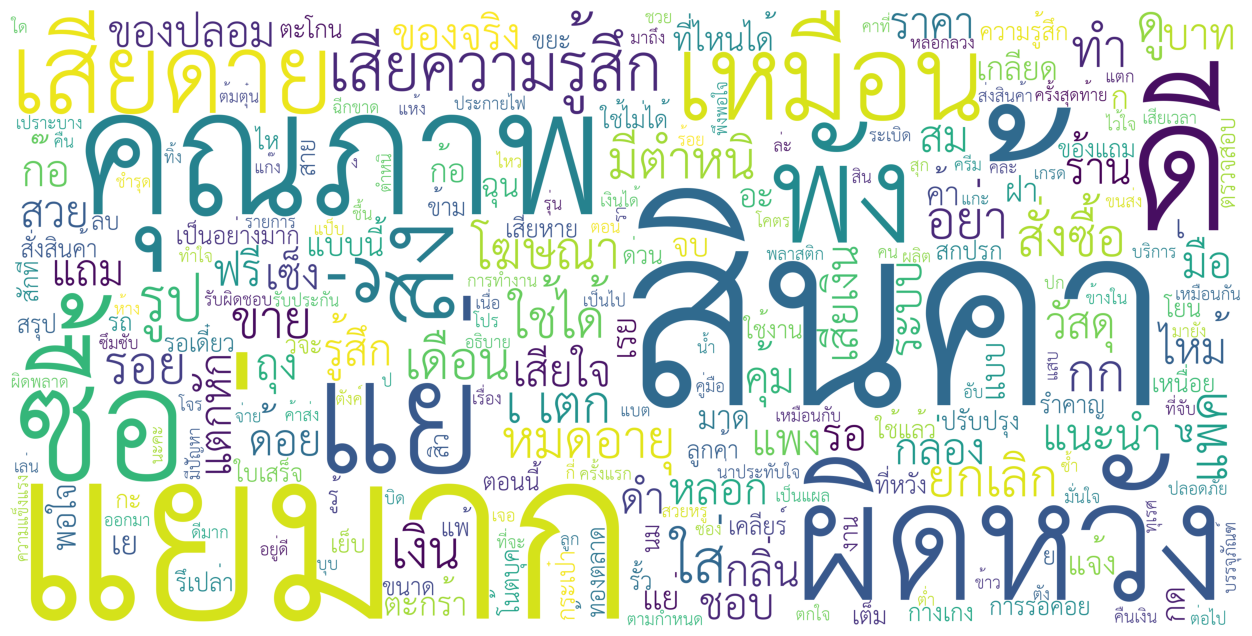

In [42]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'สั่งซื้อ': 247,
 'แล้ว': 345,
 'อยู่ดี': 270,
 'มา': 181,
 'ยกเลิก': 191,
 'เสียความรู้สึก': 310,
 'เลย': 305,
 'ครับ': 33,
 'ส่ง': 259,
 'ของ': 24,
 'รวดเร็ว': 197,
 'มาก': 182,
 'สินค้า': 253,
 'ใหม่': 364,
 'ด้วย': 94,
 'โดยรวม': 350,
 'ให้': 365,
 'คะแนนเต็ม': 48,
 'ไม่': 370,
 'พึงพอใจ': 175,
 'ผลิต': 164,
 'จาก': 74,
 'พลาสติก': 170,
 'ด้อย': 95,
 'คุณภาพ': 57,
 'ก๊อ': 19,
 'ง': 65,
 'แก๊ง': 325,
 'ได้รับ': 368,
 'ผิดหวัง': 166,
 'ดี': 89,
 'ค่ะ': 63,
 'เสียงดี': 312,
 'เร็ว': 304,
 'ราคา': 209,
 'นี้': 141,
 'คุ้ม': 59,
 'ใช้งาน': 357,
 'ได้ดี': 367,
 'แพง': 337,
 'ไว': 373,
 'สั่ง': 246,
 'ตอนเย็น': 103,
 'ตอนเช้า': 102,
 'ได้': 366,
 'แพ็ค': 338,
 'ดีมาก': 90,
 'ปกติ': 157,
 'มีปัญหา': 187,
 'อะไร': 276,
 'ถือว่า': 117,
 'คุ้มค่า': 60,
 'สุด': 257,
 'เสียใจ': 316,
 'ความรู้สึก': 42,
 'กระเป๋า': 3,
 'บาง': 151,
 'ตรง': 98,
 'กะ': 7,
 'แบบ': 333,
 'ที่': 129,
 'ลง': 221,
 'การ': 10,
 'ก็': 16,
 'แย่': 342,
 'เอา': 323,
 'ถุง': 118,
 'ดำ': 88,
 'ใส่': 362,
 'ขยะ': 22,
 'แถม': 3

In [49]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow_df = pd.DataFrame(train_bow.toarray(), 
                            columns=cvec.get_feature_names_out(),
                            index=X_train['text_tokens'])

In [51]:
train_bow_df.head()

,ok,กก,กด,กระเป๋า,กลิ่น,กล่อง,กว่า,กะ,กับ,กางเกง,...,ไป,ไม่,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไหม้,ไหล,ไหว
text_tokens,,,,,,,,,,,,,,,,,,,,,
สั่งซื้อ แล้ว อยู่ดี มา ยกเลิก เสียความรู้สึก เลย ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ส่ง ของ รวดเร็ว มาก สินค้า ใหม่ ด้วย โดยรวม ให้ คะแนนเต็ม ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไม่ พึงพอใจ เลย สินค้า ผลิต จาก พลาสติก ด้อย คุณภาพ ก๊อ ง แก๊ง มาก,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ได้รับ ของ แล้ว ผิดหวัง มาก ไม่ ดี เลย ค่ะ,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
เสียงดี ส่ง เร็ว ราคา นี้ คุ้ม ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       1.00      0.78      0.88        27
         pos       0.67      1.00      0.80        12

    accuracy                           0.85        39
   macro avg       0.83      0.89      0.84        39
weighted avg       0.90      0.85      0.85        39



In [59]:
my_text = 'ใช้ดีขนาดนี้'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)